In [1]:
## ========================== Import Package ========================== ##

import numpy as np
import math
import matplotlib.pyplot as plt
import time
import scipy.stats as ss

## ========================== Parameter Declaration ========================== ##

filter_order = 10
mu = [0, 4]
sigma = 0.1
time_length = 2
freq = [1000, 2000]
sampling_freq = 10000

## =========================== Generate Sampeles =========================== ##

# Generate input signal

t = np.arange(0, time_length, 1/sampling_freq)
input_x = np.sin(2 * math.pi * freq[0] * t)
desired_y = np.sin(2 * math.pi * freq[1] * t)

# Gaussian Mixture Noise

n = len(desired_y)
norm_params = np.array([[mu[0], sigma],
                        [mu[1], sigma]])
n_components = norm_params.shape[0]
weights = [0.9, 0.1]
mixture_idx = np.random.choice(len(weights), size = n, replace = True, p = weights)
noise = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

noisy_y = desired_y + noise


# Input and Output of Adaptive Filter

signal_x = input_x.copy()
signal_y = desired_y.copy()
signal_ny = noisy_y.copy()

The time of execution using KLMS: 108.54435658454895


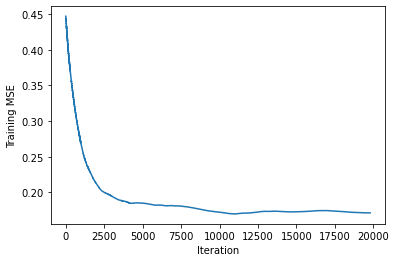

In [2]:
# KLMS-MSE Algorithm

# noisy desired response

mu = 0.01 # step size
MSE_test_num = 100
h = 1 / (2 * 0.4 ** 2) # parameter of Gaussian kernel

# data process with filter order
filter_x = np.array([signal_x[i-filter_order:i][::-1] for i in range(filter_order, len(signal_x))])
filter_y = signal_y[filter_order:len(signal_x)]
filter_ny = signal_ny[filter_order:len(signal_x)]

# define kernel
def kernel(x1, x2, h):
    return np.exp(-h * np.sum((x1 - x2) ** 2, axis = 1))

# define KLMS
nKLMS_error_store = []
nKLMS_center_list = []
nKLMS_alpha_list = []
nKLMS_network_size = []
nKLMS_trainMSE_store = []

nKLMS_start = time.time()

for i in range (len(filter_x)): #len(filter_x) - MSE_test_num
    if i == 0:
        filter_output = 0
    else:
        filter_output = np.array(nKLMS_alpha_list) @ kernel(filter_x[i], np.array(nKLMS_center_list), h)
    nKLMS_error_store.append(filter_y[i] - filter_output)
    nKLMS_alpha_list.append(mu * (filter_ny[i] - filter_output))
    nKLMS_center_list.append(filter_x[i])
    nKLMS_network_size.append(len(nKLMS_center_list))
    nKLMS_trainMSE_store.append(np.sum((np.array(nKLMS_error_store) ** 2))/len(nKLMS_error_store))
    print(i)
    

nKLMS_end = time.time()
print('The time of execution using KLMS:', nKLMS_end - nKLMS_start)
    
# training MSE
plt.plot(np.arange(len(nKLMS_trainMSE_store[200:])), nKLMS_trainMSE_store[200:])
plt.xlabel('Iteration')
plt.ylabel('Training MSE')
plt.show()

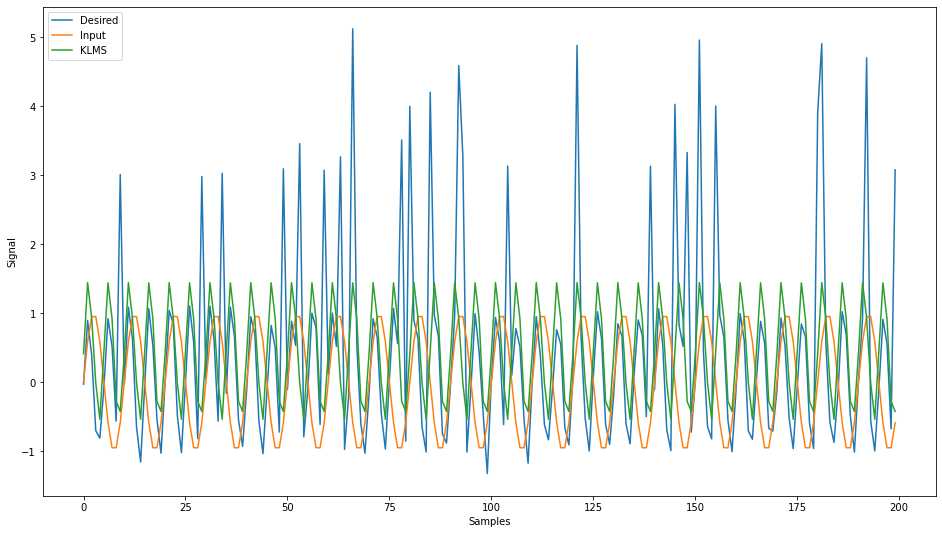

In [3]:
filter_xx = np.array([signal_x[i-filter_order:i][::-1] for i in range(filter_order, len(signal_x))])
filter_nyy = signal_ny[filter_order:len(signal_x)]

nKLMS_filter_yy = []

for kk in range (len(filter_nyy)):
    nKLMS_filter_yy.append(np.array(nKLMS_alpha_list) @ kernel(filter_xx[kk], np.array(nKLMS_center_list), h))

fig = plt.figure(figsize = (16,9))
l1 = plt.plot(np.arange(len(filter_nyy[0:200])), filter_nyy[0:200])
l2 = plt.plot(np.arange(len(filter_xx[0:200,filter_order-1])), filter_xx[0:200,filter_order-1])
l3 = plt.plot(np.arange(len(filter_nyy[0:200])), nKLMS_filter_yy[0:200])
plt.legend(['Desired', 'Input', 'KLMS'])
plt.xlabel('Samples')
plt.ylabel('Signal')
plt.show()

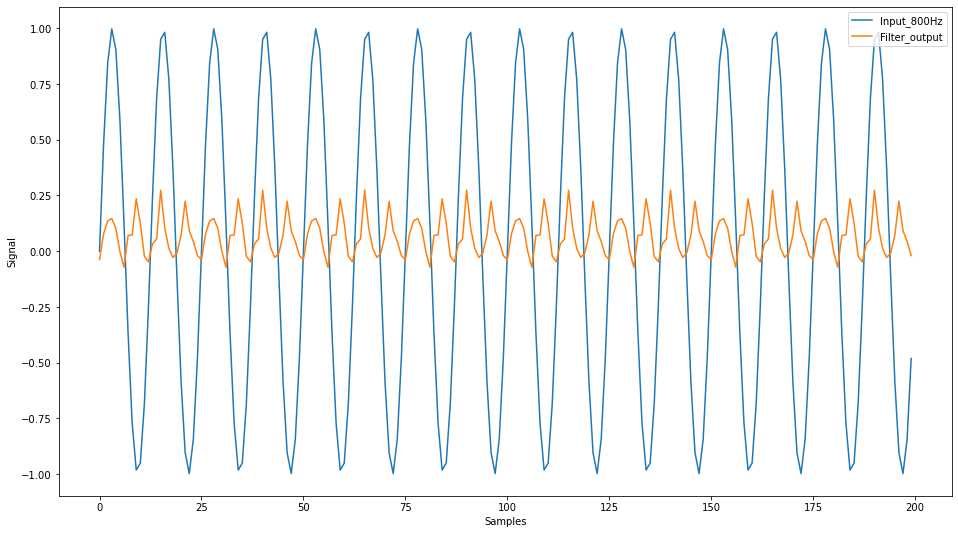

In [4]:
# Test the generalization of the trained model

# Generate test signal 2

freq_test = 800
input_x_test = np.sin(2 * math.pi * freq_test * t)

filter_xx_test = np.array([input_x_test[i-filter_order:i][::-1] for i in range(filter_order, len(input_x_test))])

nKLMS_filter_yy_test = []

for kk in range (filter_xx_test.shape[0]):
    nKLMS_filter_yy_test.append(np.array(nKLMS_alpha_list) @ kernel(filter_xx_test[kk], np.array(nKLMS_center_list), h))

fig = plt.figure(figsize = (16,9))
l1 = plt.plot(np.arange(len(filter_xx_test[0:200,filter_order-1])), filter_xx_test[0:200,filter_order-1])
l2 = plt.plot(np.arange(len(nKLMS_filter_yy_test[0:200])), nKLMS_filter_yy_test[0:200])
plt.legend(['Input_800Hz', 'Filter_output'])
plt.xlabel('Samples')
plt.ylabel('Signal')
plt.show()

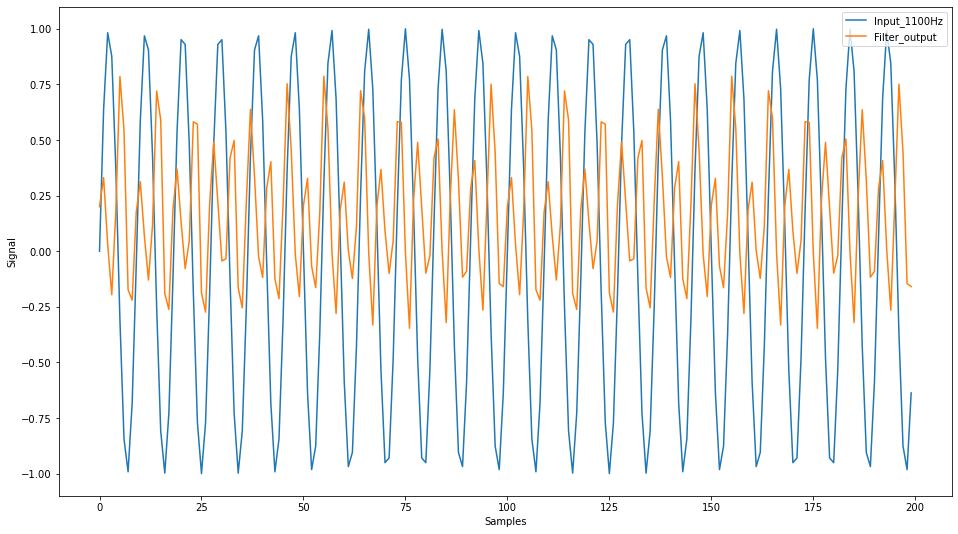

In [5]:
# Test the generalization of the trained model

# Generate test signal 2

freq_test = 1100
input_x_test = np.sin(2 * math.pi * freq_test * t)

filter_xx_test = np.array([input_x_test[i-filter_order:i][::-1] for i in range(filter_order, len(input_x_test))])

nKLMS_filter_yy_test = []

for kk in range (filter_xx_test.shape[0]):
    nKLMS_filter_yy_test.append(np.array(nKLMS_alpha_list) @ kernel(filter_xx_test[kk], np.array(nKLMS_center_list), h))

fig = plt.figure(figsize = (16,9))
l1 = plt.plot(np.arange(len(filter_xx_test[0:200,filter_order-1])), filter_xx_test[0:200,filter_order-1])
l2 = plt.plot(np.arange(len(nKLMS_filter_yy_test[0:200])), nKLMS_filter_yy_test[0:200])
plt.legend(['Input_1100Hz', 'Filter_output'])
plt.xlabel('Samples')
plt.ylabel('Signal')
plt.show()

The time of execution using KLMS: 0.2027606964111328


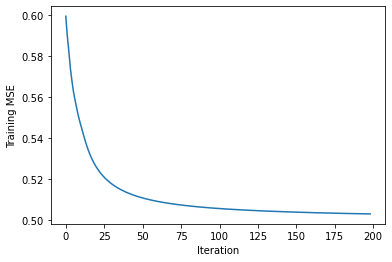

In [60]:
# LMS-MEE Algorithm

# noisy desired response
batch_size = 100
mu = 0.01 # step size
h = 1 / (2 * 0.4 ** 2) # parameter of Gaussian kernel

# data process with filter order
filter_x = np.array([signal_x[i-filter_order:i][::-1] for i in range(filter_order, len(signal_x))])
filter_y = signal_y[filter_order:len(signal_x)]
filter_ny = signal_ny[filter_order:len(signal_x)]

# define kernel
def kernel(x1, x2, h):
    return np.exp(-h * (x1 - x2) ** 2)

# define LMS-MEE
weight_MEE_store = []
LMS_trainMEE_store = []
LMS_error_store = []

LMS_MEE_start = time.time()

weight_filter = np.random.normal(0, 0.1, filter_order)

for i in range (int(len(filter_x)/batch_size)):
    
    batch_error = np.array(filter_ny[i*batch_size:(i+1)*batch_size] - weight_filter @ filter_x[i*batch_size:(i+1)*batch_size].T)
    weight_update = []
    for mm in range (batch_size):
        weight_update.append(kernel(batch_error[mm], batch_error, h) * (batch_error[mm] - batch_error) @ (filter_x[i*batch_size+mm] - filter_x[i*batch_size:(i+1)*batch_size]))
    weight_filter = weight_filter + mu/batch_size * np.sum(np.array(weight_update), axis = 0)
    weight_MEE_store.append(weight_filter)
    LMS_error_store.append(filter_y[i*batch_size:(i+1)*batch_size] - weight_filter @ filter_x[i*batch_size:(i+1)*batch_size].T)
    LMS_trainMEE_store.append(np.sum(np.array(LMS_error_store).flatten() ** 2)/len(np.array(LMS_error_store).flatten()))  

LMS_MEE_end = time.time()
print('The time of execution using KLMS:', LMS_MEE_end - LMS_MEE_start)
    
# training MEE
plt.plot(np.arange(len(LMS_trainMEE_store)), LMS_trainMEE_store)
plt.xlabel('Iteration')
plt.ylabel('Training MSE')
plt.show()

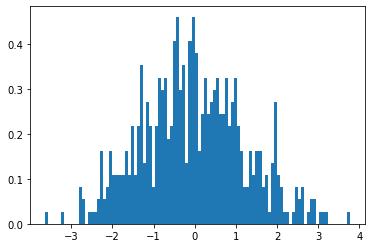

In [52]:
l1 = plt.hist(batch_error, bins = 100, density = True)

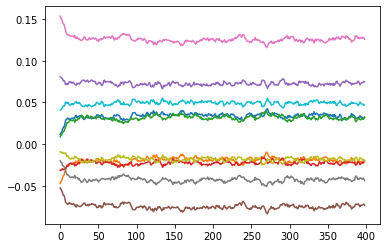

In [27]:
l1 = plt.plot(weight_MEE_store)

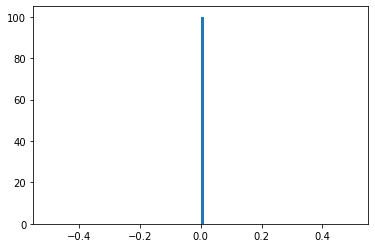

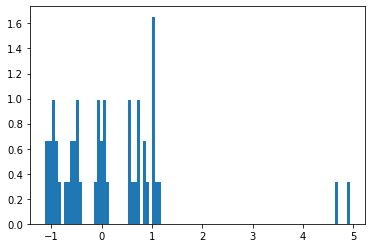

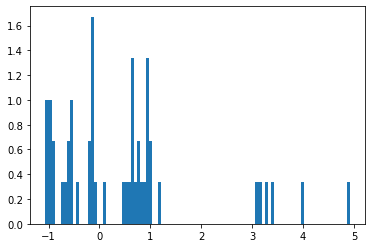

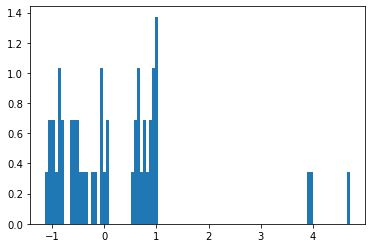

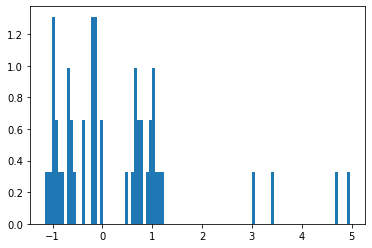

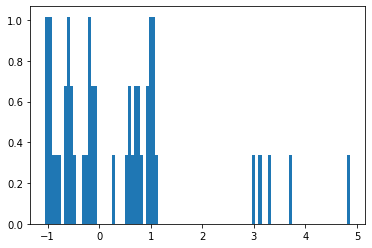

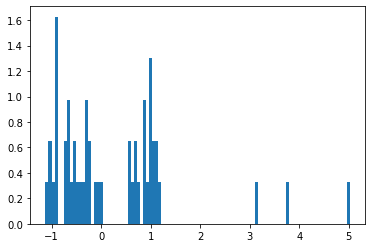

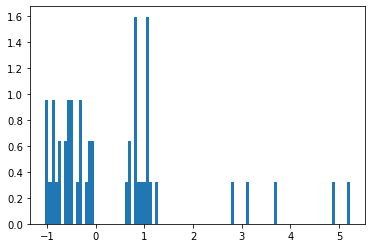

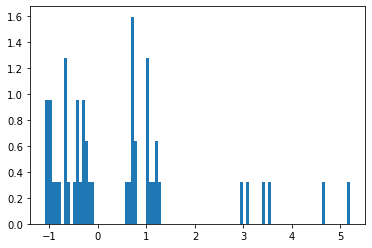

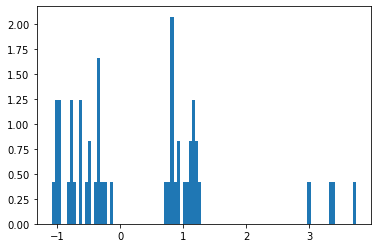

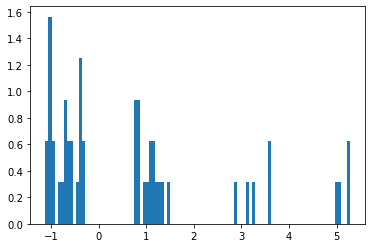

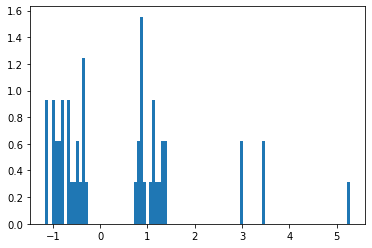

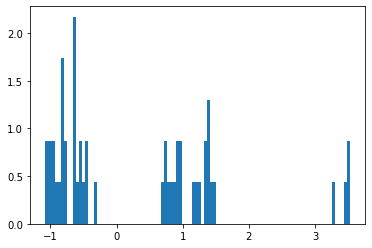

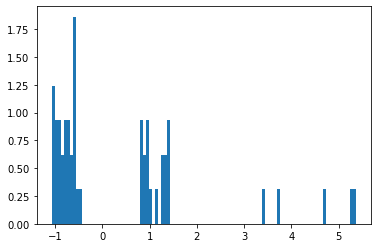

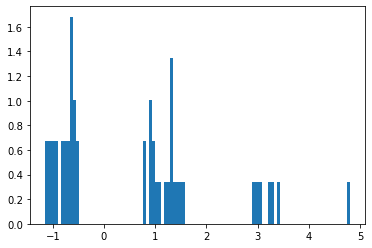

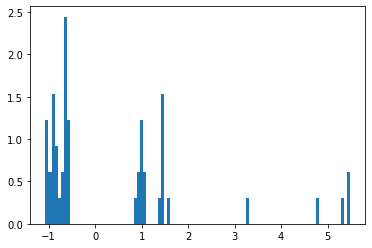

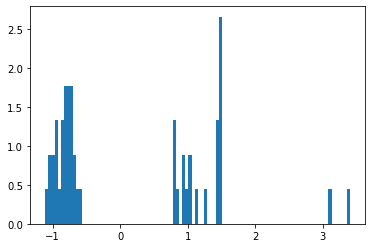

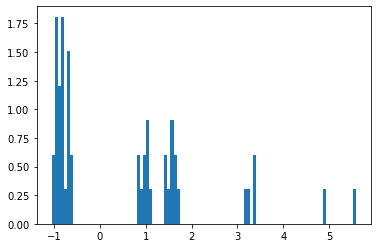

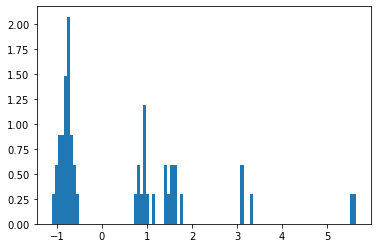

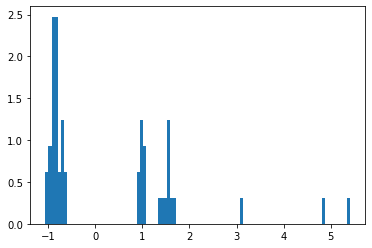

In [51]:
# KLMS-MEE Algorithm

# noisy desired response
batch_size = 50
mu = 0.01 # step size
h = 1 / (2 * 0.4 ** 2) # parameter of Gaussian kernel

# data process with filter order
filter_x = np.array([signal_x[i-filter_order:i][::-1] for i in range(filter_order, len(signal_x))])
filter_y = signal_y[filter_order:len(signal_x)]
filter_ny = signal_ny[filter_order:len(signal_x)]

# define kernel
def kernel_vector(x1, x2, h):
    return np.exp(-h * np.sum((x1 - x2) ** 2, axis = 1))

def kernel(x1, x2, h):
    return np.exp(-h * (x1 - x2) ** 2)

# define KLMS-MEE

KMEE_error_store = []
KMEE_center_list = []
# KMEE_alpha_list = []
KMEE_trainMEE_store = []

KMEE_start = time.time()

for i in range (len(filter_x)):
    if i == 0:
        filter_output = 0
        batch_error = 0
        KMEE_alpha_list = np.array([mu * (filter_ny[i] - filter_output)])
    elif i <= batch_size:
        batch_error = []
        for nn in range (i): 
            batch_error.append(filter_ny[nn] - kernel_vector(filter_x[nn], np.array(KMEE_center_list), h) @ np.array(KMEE_alpha_list))
        batch_error = np.array(batch_error)
        if i == 1:
            KMEE_alpha_list = KMEE_alpha_list + mu / len(batch_error) * np.mean(kernel(batch_error[-1], batch_error, h)) * kernel(batch_error[-1], batch_error[0], h) * (batch_error[-1] - batch_error[0])
            KMEE_alpha_list = np.append(KMEE_alpha_list, - mu / len(batch_error) * np.mean(kernel(batch_error[-1], batch_error, h)) * np.sum(kernel(batch_error[-1], batch_error[0], h) * (batch_error[-1] - batch_error[0])))        
        else:
            KMEE_alpha_list[1:] = KMEE_alpha_list[1:] + mu / len(batch_error) * np.mean(kernel(batch_error[-1], batch_error, h)) * kernel(batch_error[-1], batch_error[0:-1], h) * (batch_error[-1] - batch_error[0:-1])
            KMEE_alpha_list = np.append(KMEE_alpha_list, - mu / len(batch_error) * np.mean(kernel(batch_error[-1], batch_error, h)) * np.sum(kernel(batch_error[-1], batch_error[0:-1], h) * (batch_error[-1] - batch_error[0:-1])))        
    else:
        batch_error = []
        for nn in range (i-batch_size, i):
            batch_error.append(filter_ny[nn] - kernel_vector(filter_x[nn], np.array(KMEE_center_list), h) @ np.array(KMEE_alpha_list))
        batch_error = np.array(batch_error)
        KMEE_alpha_list[i-batch_size+1:] = KMEE_alpha_list[i-batch_size+1:] + mu / len(batch_error) * np.mean(kernel(batch_error[-1], batch_error, h)) * kernel(batch_error[-1], batch_error[0:-1], h) * (batch_error[-1] - batch_error[0:-1])
        KMEE_alpha_list = np.append(KMEE_alpha_list, - mu / len(batch_error) * np.mean(kernel(batch_error[-1], batch_error, h)) * np.sum(kernel(batch_error[-1], batch_error[0:-1], h) * (batch_error[-1] - batch_error[0:-1])))        
    
    KMEE_center_list.append(filter_x[i])
    if i%1000 == 0:
        plt.hist(batch_error, bins = 100, 
                 density = True)
        plt.show()

KMEE_end = time.time()

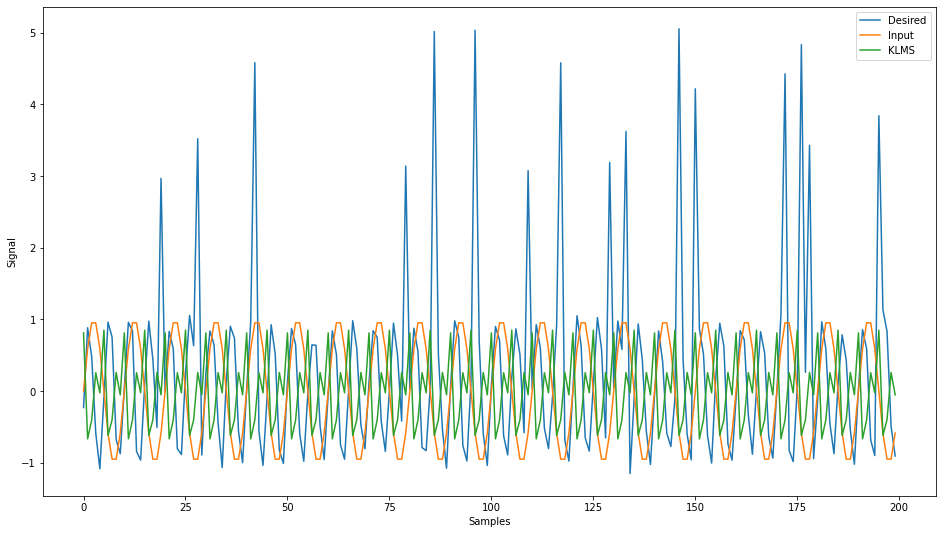

In [52]:
filter_xx = np.array([signal_x[i-filter_order:i][::-1] for i in range(filter_order, len(signal_x))])
filter_nyy = signal_ny[filter_order:len(signal_x)]

KMEE_filter_yy = []

for kk in range (len(filter_nyy)):
    KMEE_filter_yy.append(np.array(KMEE_alpha_list) @ kernel_vector(filter_xx[kk], np.array(KMEE_center_list), h))

fig = plt.figure(figsize = (16,9))
l1 = plt.plot(np.arange(len(filter_nyy[0:200])), filter_nyy[0:200])
l2 = plt.plot(np.arange(len(filter_xx[0:200,filter_order-1])), filter_xx[0:200,filter_order-1])
l3 = plt.plot(np.arange(len(filter_nyy[0:200])), KMEE_filter_yy[0:200])
plt.legend(['Desired', 'Input', 'KLMS'])
plt.xlabel('Samples')
plt.ylabel('Signal')
plt.show()

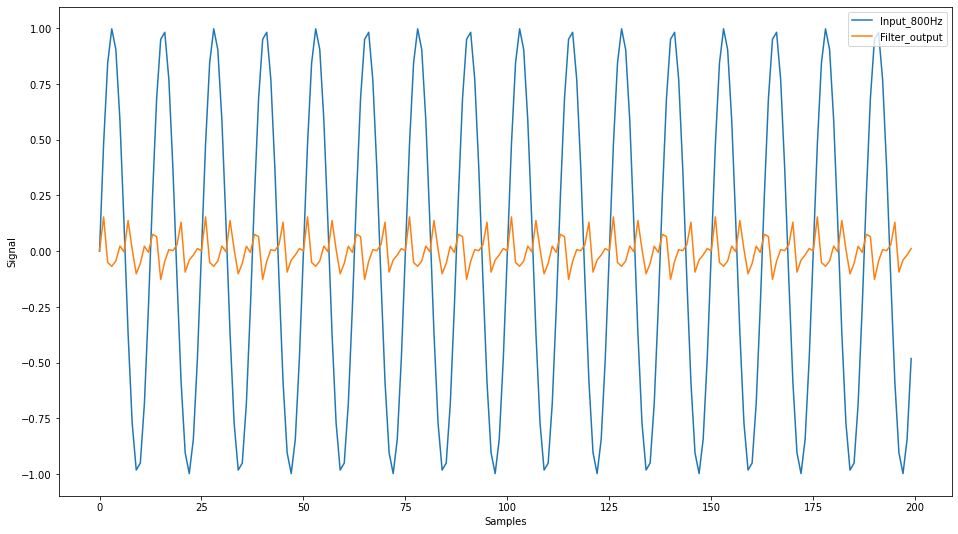

In [53]:
# Test the generalization of the trained model

# Generate test signal 2

freq_test = 800
input_x_test = np.sin(2 * math.pi * freq_test * t)

filter_xx_test = np.array([input_x_test[i-filter_order:i][::-1] for i in range(filter_order, len(input_x_test))])

KMEE_filter_yy_test = []

for kk in range (filter_xx_test.shape[0]):
    KMEE_filter_yy_test.append(np.array(KMEE_alpha_list) @ kernel_vector(filter_xx_test[kk], np.array(KMEE_center_list), h))

fig = plt.figure(figsize = (16,9))
l1 = plt.plot(np.arange(len(filter_xx_test[0:200,filter_order-1])), filter_xx_test[0:200,filter_order-1])
l2 = plt.plot(np.arange(len(KMEE_filter_yy_test[0:200])), KMEE_filter_yy_test[0:200])
plt.legend(['Input_800Hz', 'Filter_output'])
plt.xlabel('Samples')
plt.ylabel('Signal')
plt.show()

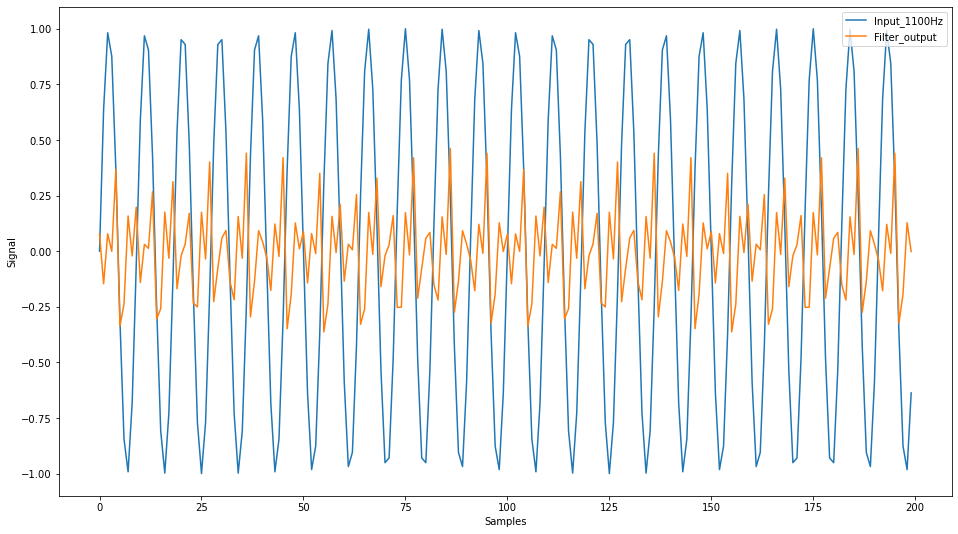

In [54]:
# Test the generalization of the trained model

# Test the generalization of the trained model

# Generate test signal 2

freq_test = 1100
input_x_test = np.sin(2 * math.pi * freq_test * t)

filter_xx_test = np.array([input_x_test[i-filter_order:i][::-1] for i in range(filter_order, len(input_x_test))])

KMEE_filter_yy_test = []

for kk in range (filter_xx_test.shape[0]):
    KMEE_filter_yy_test.append(np.array(KMEE_alpha_list) @ kernel_vector(filter_xx_test[kk], np.array(KMEE_center_list), h))

fig = plt.figure(figsize = (16,9))
l1 = plt.plot(np.arange(len(filter_xx_test[0:200,filter_order-1])), filter_xx_test[0:200,filter_order-1])
l2 = plt.plot(np.arange(len(KMEE_filter_yy_test[0:200])), KMEE_filter_yy_test[0:200])
plt.legend(['Input_1100Hz', 'Filter_output'])
plt.xlabel('Samples')
plt.ylabel('Signal')
plt.show()